The Below Code is to predict AAPL's volatility over the span of 21 July 2025 to 26 July 2025, using historical data from 2024 to 2025 until 19 July to train the model.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Iteration:      1,   Func. Count:      5,   Neg. LLF: 225911982.2594229
Iteration:      2,   Func. Count:     11,   Neg. LLF: 817.1949029757981
Iteration:      3,   Func. Count:     18,   Neg. LLF: 744.6351617452781
Iteration:      4,   Func. Count:     22,   Neg. LLF: 744.6270459326697
Iteration:      5,   Func. Count:     26,   Neg. LLF: 744.6712998755849
Iteration:      6,   Func. Count:     31,   Neg. LLF: 744.6247877782882
Iteration:      7,   Func. Count:     35,   Neg. LLF: 744.6244064317186
Iteration:      8,   Func. Count:     39,   Neg. LLF: 744.6243890316641
Iteration:      9,   Func. Count:     42,   Neg. LLF: 744.6243890316116
Optimization terminated successfully    (Exit mode 0)
            Current function value: 744.6243890316641
            Iterations: 9
            Function evaluations: 42
            Gradient evaluations: 9
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                 Return   R-squared:                

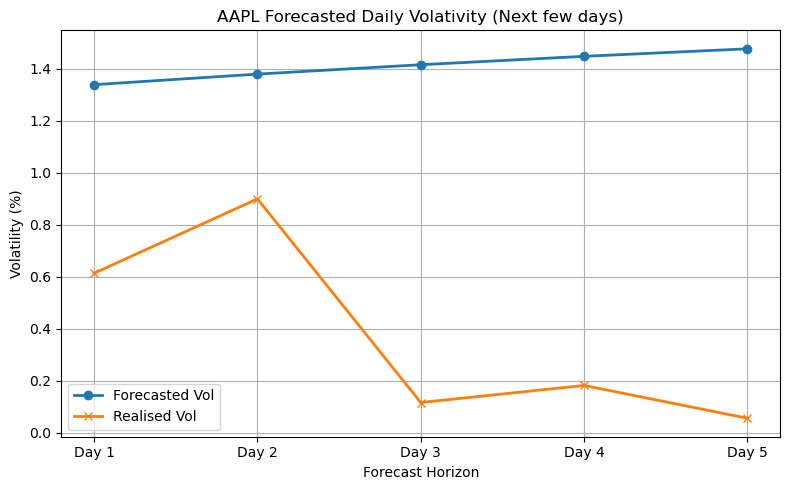

In [10]:
import yfinance as yf
import numpy as np
import math

## IMPORT DATA FROM YAHOO FINANCE
stock = "AAPL"
data = yf.download(stock, start="2024-01-01", end="2025-07-19", auto_adjust = False)
data['Return'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
returns = data['Return'].dropna()


## INTRODUCE GARCH MODELLING
from arch import arch_model

model = arch_model(returns * 100, vol='GARCH', p=1, q=1, mean='Zero')
result = model.fit()
print(result.summary())


## FORECASTING VOLATILITY
forecast = result.forecast(horizon=5)
print(forecast.variance[-1:])

variance_row = forecast.variance.iloc[-1]

for i in range(len(variance_row)):
    variance_val = forecast.variance.iloc[-1, i]
    sqrt = math.sqrt(variance_val)
    print(f'h.{i+1}:  {round(sqrt,2)} %')

## EXTRACT REAL DATA TO COMPARE VOLATILITY
data_real = yf.download(stock, start="2024-01-01", end="2025-07-26", auto_adjust = False)
data_real['Return'] = np.log(data_real['Adj Close'] / data_real['Adj Close'].shift(1))
returns_real = data_real['Return'].dropna()

realised_returns = returns_real.loc["2025-07-21":'2025-07-25']
realised_vols = realised_returns.abs() * 100


## PRINTING RESULTS
import pandas as pd

comparison = pd.DataFrame({
    'Forecasted Vol (%)': [round(math.sqrt(v), 2) for v in variance_row],
    'Realised Vol (%)': realised_vols.values
}, index=realised_vols.index)

print(comparison)


## ERROR CHECKING
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(comparison['Realised Vol (%)'], comparison['Forecasted Vol (%)'])
rmse = math.sqrt(mean_squared_error(comparison['Realised Vol (%)'], comparison['Forecasted Vol (%)']))

print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")


## PLOTTING IT IN A CHART
import matplotlib.pyplot as plt

vol_list = [math.sqrt(v) for v in variance_row]

days = [f'Day {i+1}' for i in range(len(vol_list))]     #setting up x-axis

plt.figure(figsize=(8, 5))
plt.plot(days, vol_list, marker='o', linestyle='-', linewidth=2, label='Forecasted Vol')
plt.plot(days, realised_vols.values, marker='x', linestyle='-', linewidth=2, label='Realised Vol')
plt.title(f"{stock} Forecasted Daily Volativity (Next few days)")
plt.xlabel("Forecast Horizon")
plt.ylabel("Volatility (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The Below Code is to predict NVDA's volatility over the span of 21 July 2025 to 26 July 2025, using historical data from 2024 to 2025 until 19 July to train the model.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Iteration:      1,   Func. Count:      5,   Neg. LLF: 1099.9671246609137
Iteration:      2,   Func. Count:     10,   Neg. LLF: 1073.7308336054434
Iteration:      3,   Func. Count:     16,   Neg. LLF: 1157.2012252098364
Iteration:      4,   Func. Count:     21,   Neg. LLF: 1022.1161224483664
Iteration:      5,   Func. Count:     25,   Neg. LLF: 1021.9344666196819
Iteration:      6,   Func. Count:     29,   Neg. LLF: 1021.9062402520268
Iteration:      7,   Func. Count:     33,   Neg. LLF: 1021.9037542809195
Iteration:      8,   Func. Count:     37,   Neg. LLF: 1021.9031270077469
Iteration:      9,   Func. Count:     41,   Neg. LLF: 1021.9031225315716
Iteration:     10,   Func. Count:     44,   Neg. LLF: 1021.9031225318437
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1021.9031225315716
            Iterations: 10
            Function evaluations: 44
            Gradient evaluations: 10
                       Zero Mean - GARCH Model Results      

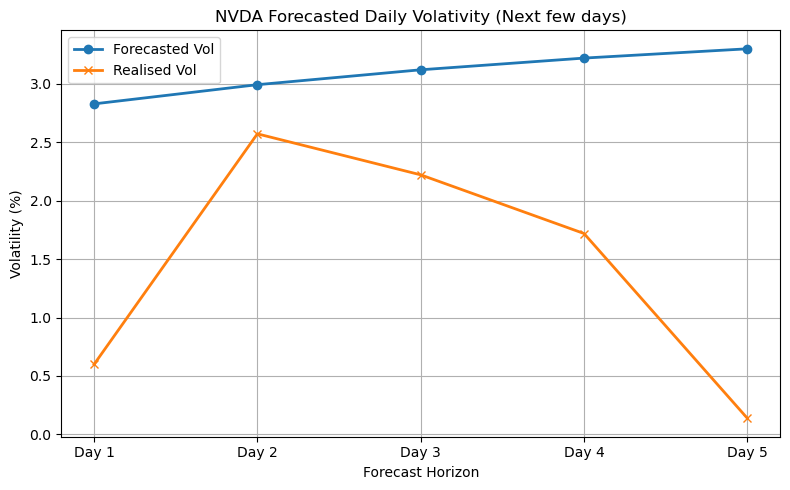

In [11]:
import yfinance as yf
import numpy as np
import math

## IMPORT DATA FROM YAHOO FINANCE
stock = "NVDA"
data = yf.download(stock, start="2024-01-01", end="2025-07-19", auto_adjust = False)
data['Return'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
returns = data['Return'].dropna()


## INTRODUCE GARCH MODELLING
from arch import arch_model

model = arch_model(returns * 100, vol='GARCH', p=1, q=1, mean='Zero')
result = model.fit()
print(result.summary())


## FORECASTING VOLATILITY
forecast = result.forecast(horizon=5)
print(forecast.variance[-1:])

variance_row = forecast.variance.iloc[-1]

for i in range(len(variance_row)):
    variance_val = forecast.variance.iloc[-1, i]
    sqrt = math.sqrt(variance_val)
    print(f'h.{i+1}:  {round(sqrt,2)} %')

## EXTRACT REAL DATA TO COMPARE VOLATILITY
data_real = yf.download(stock, start="2024-01-01", end="2025-07-26", auto_adjust = False)
data_real['Return'] = np.log(data_real['Adj Close'] / data_real['Adj Close'].shift(1))
returns_real = data_real['Return'].dropna()

realised_returns = returns_real.loc["2025-07-21":'2025-07-25']
realised_vols = realised_returns.abs() * 100


## PRINTING RESULTS
import pandas as pd

comparison = pd.DataFrame({
    'Forecasted Vol (%)': [round(math.sqrt(v), 2) for v in variance_row],
    'Realised Vol (%)': realised_vols.values
}, index=realised_vols.index)

print(comparison)


## ERROR CHECKING
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(comparison['Realised Vol (%)'], comparison['Forecasted Vol (%)'])
rmse = math.sqrt(mean_squared_error(comparison['Realised Vol (%)'], comparison['Forecasted Vol (%)']))

print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")


## PLOTTING IT IN A CHART
import matplotlib.pyplot as plt

vol_list = [math.sqrt(v) for v in variance_row]

days = [f'Day {i+1}' for i in range(len(vol_list))]     #setting up x-axis

plt.figure(figsize=(8, 5))
plt.plot(days, vol_list, marker='o', linestyle='-', linewidth=2, label='Forecasted Vol')
plt.plot(days, realised_vols.values, marker='x', linestyle='-', linewidth=2, label='Realised Vol')
plt.title(f"{stock} Forecasted Daily Volativity (Next few days)")
plt.xlabel("Forecast Horizon")
plt.ylabel("Volatility (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The Below Code is to predict VOO's volatility over the span of 21 July 2025 to 26 July 2025, using historical data from 2024 to 2025 until 19 July to train the model.

[*********************100%***********************]  1 of 1 completed


Iteration:      1,   Func. Count:      5,   Neg. LLF: 854.7960324004213
Iteration:      2,   Func. Count:     14,   Neg. LLF: 621.1732152414597
Iteration:      3,   Func. Count:     21,   Neg. LLF: 565.7534775988821
Iteration:      4,   Func. Count:     27,   Neg. LLF: 514.7221850775006
Iteration:      5,   Func. Count:     32,   Neg. LLF: 511.7075452939705
Iteration:      6,   Func. Count:     36,   Neg. LLF: 511.7056426546946
Iteration:      7,   Func. Count:     40,   Neg. LLF: 511.70544908683956
Iteration:      8,   Func. Count:     44,   Neg. LLF: 511.70544015328176
Iteration:      9,   Func. Count:     47,   Neg. LLF: 511.705440153179
Optimization terminated successfully    (Exit mode 0)
            Current function value: 511.70544015328176
            Iterations: 9
            Function evaluations: 47
            Gradient evaluations: 9
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                 Return   R-squared:              

[*********************100%***********************]  1 of 1 completed

            Forecasted Vol (%)  Realised Vol (%)
Date                                            
2025-07-21                0.66          0.178380
2025-07-22                0.68          0.000000
2025-07-23                0.70          0.845961
2025-07-24                0.72          0.068608
2025-07-25                0.74          0.396977
MAE: 0.4604, RMSE: 0.5015


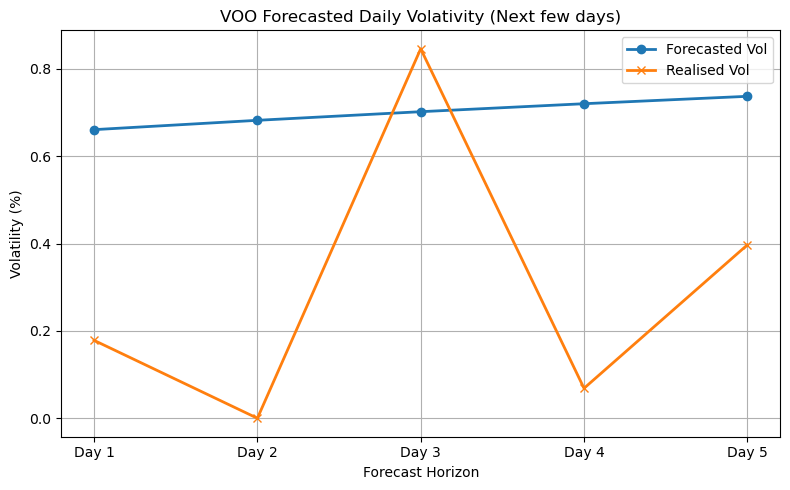

In [12]:
import yfinance as yf
import numpy as np
import math

## IMPORT DATA FROM YAHOO FINANCE
stock = "VOO"
data = yf.download(stock, start="2024-01-01", end="2025-07-19", auto_adjust = False)
data['Return'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
returns = data['Return'].dropna()


## INTRODUCE GARCH MODELLING
from arch import arch_model

model = arch_model(returns * 100, vol='GARCH', p=1, q=1, mean='Zero')
result = model.fit()
print(result.summary())


## FORECASTING VOLATILITY
forecast = result.forecast(horizon=5)
print(forecast.variance[-1:])

variance_row = forecast.variance.iloc[-1]

for i in range(len(variance_row)):
    variance_val = forecast.variance.iloc[-1, i]
    sqrt = math.sqrt(variance_val)
    print(f'h.{i+1}:  {round(sqrt,2)} %')

## EXTRACT REAL DATA TO COMPARE VOLATILITY
data_real = yf.download(stock, start="2024-01-01", end="2025-07-26", auto_adjust = False)
data_real['Return'] = np.log(data_real['Adj Close'] / data_real['Adj Close'].shift(1))
returns_real = data_real['Return'].dropna()

realised_returns = returns_real.loc["2025-07-21":'2025-07-25']
realised_vols = realised_returns.abs() * 100


## PRINTING RESULTS
import pandas as pd

comparison = pd.DataFrame({
    'Forecasted Vol (%)': [round(math.sqrt(v), 2) for v in variance_row],
    'Realised Vol (%)': realised_vols.values
}, index=realised_vols.index)

print(comparison)


## ERROR CHECKING
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(comparison['Realised Vol (%)'], comparison['Forecasted Vol (%)'])
rmse = math.sqrt(mean_squared_error(comparison['Realised Vol (%)'], comparison['Forecasted Vol (%)']))

print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")


## PLOTTING IT IN A CHART
import matplotlib.pyplot as plt

vol_list = [math.sqrt(v) for v in variance_row]

days = [f'Day {i+1}' for i in range(len(vol_list))]     #setting up x-axis

plt.figure(figsize=(8, 5))
plt.plot(days, vol_list, marker='o', linestyle='-', linewidth=2, label='Forecasted Vol')
plt.plot(days, realised_vols.values, marker='x', linestyle='-', linewidth=2, label='Realised Vol')
plt.title(f"{stock} Forecasted Daily Volativity (Next few days)")
plt.xlabel("Forecast Horizon")
plt.ylabel("Volatility (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()